In [0]:
import random
import pandas as pd
from collections import Counter
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics
from sklearn.cluster import KMeans, Birch, DBSCAN

In [0]:
X1 = np.random.rand(10000, 2) * np.array([1, 1000])
X2 = np.random.rand(10000, 2) * np.array([1, 1000]) + np.array([3, 0])

X = np.concatenate((X1, X2))[:, 0]
Y = np.concatenate((X1, X2))[:, 1]

X_norm = (X - np.min(X)) / (np.max(X) - np.min(X))
Y_norm = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))

X_std = (X - X.mean()) / X.std()
Y_std = (Y - Y.mean()) / Y.std()

r = [1, 10]

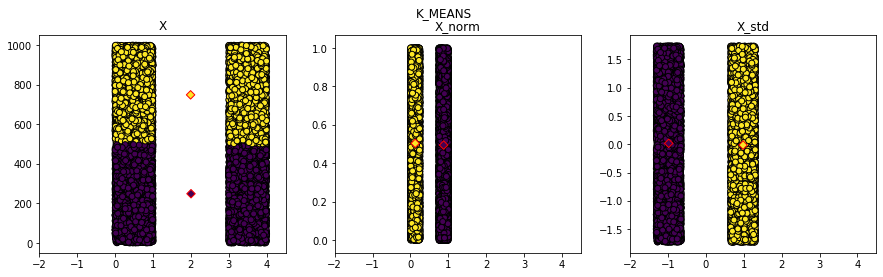

In [26]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
fig.suptitle('K_MEANS')
for i, data in enumerate([np.c_[X, Y], np.c_[X_norm, Y_norm], np.c_[X_std, Y_std]]):
    model = KMeans(n_clusters=2)
    model.fit(data)
    axes[i].scatter(data[:,0], data[:,1], c=model.labels_, edgecolors='black')
    axes[i].scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c=np.arange(2), edgecolors='red', marker='D')
    axes[i].set_title(['X', 'X_norm','X_std'][i])
    axes[i].set_xlim((-2, 4.5))


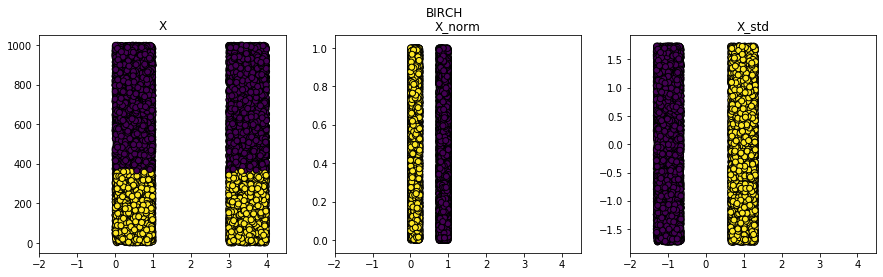

In [35]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
fig.suptitle('BIRCH')
for i, data in enumerate([np.c_[X, Y], np.c_[X_norm, Y_norm], np.c_[X_std, Y_std]]):
    model = Birch(n_clusters=2, threshold=0.4, branching_factor=100)
    model.fit(data)
    centers=model.subcluster_centers_
    axes[i].scatter(data[:,0], data[:,1], c=model.labels_, edgecolors='black')
    axes[i].set_title(['X', 'X_norm','X_std'][i])
    axes[i].set_xlim((-2, 4.5))

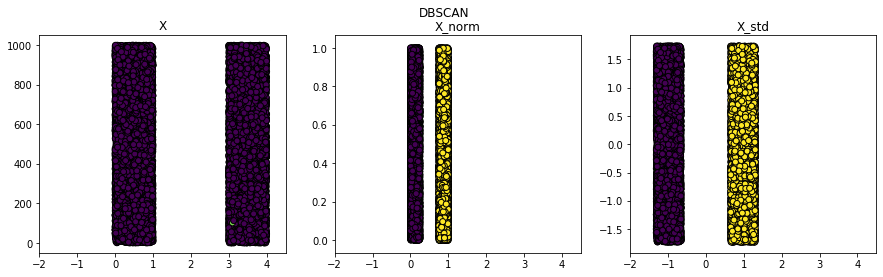

In [37]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
fig.suptitle('DBSCAN')
for i, data in enumerate([np.c_[X, Y], np.c_[X_norm, Y_norm], np.c_[X_std, Y_std]]):
    model = DBSCAN(eps=0.1)
    model.fit(data)
    axes[i].scatter(data[:,0], data[:,1], c=model.labels_, edgecolors='black')
    axes[i].set_title(['X', 'X_norm','X_std'][i])
    axes[i].set_xlim((-2, 4.5))